In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train_path = os.path.join('Day2data/application_train.csv')
train = pd.read_csv(train_path)
train.shape

(307511, 122)

In [3]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in train:
    if train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            train[col] = le.fit_transform(train[col])            
print(train.shape)
train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
train['DAYS_EMPLOYED_ANOM'] = train["DAYS_EMPLOYED"] == 365243
train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
train['DAYS_BIRTH'] = abs(train['DAYS_BIRTH'])

In [5]:
x = train.corr()['TARGET']

In [6]:
x.shape

(110,)

In [7]:
# find the collumns with the most positive correlation coefficient
x.sort_values(ascending=False)[0:14]

TARGET                         1.000000
DAYS_EMPLOYED                  0.074958
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055218
DAYS_ID_PUBLISH                0.051457
REG_CITY_NOT_WORK_CITY         0.050994
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_DOCUMENT_3                0.044346
DAYS_REGISTRATION              0.041975
OWN_CAR_AGE                    0.037612
LIVE_CITY_NOT_WORK_CITY        0.032518
DEF_30_CNT_SOCIAL_CIRCLE       0.032248
Name: TARGET, dtype: float64

In [8]:
# find the collumns with the most negative correlation coefficient
x.sort_values(ascending=True)[0:14]

EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_1                 -0.155317
DAYS_BIRTH                   -0.078239
DAYS_EMPLOYED_ANOM           -0.045987
FLOORSMAX_AVG                -0.044003
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_MODE               -0.043226
AMT_GOODS_PRICE              -0.039645
REGION_POPULATION_RELATIVE   -0.037227
ELEVATORS_AVG                -0.034199
ELEVATORS_MEDI               -0.033863
FLOORSMIN_AVG                -0.033614
FLOORSMIN_MEDI               -0.033394
Name: TARGET, dtype: float64

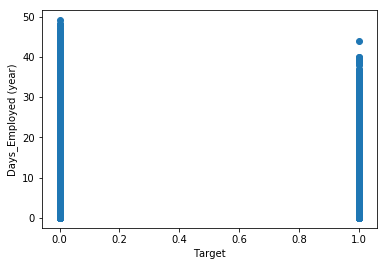

In [9]:
# plot the Target and Days_employed to see their relationship
plt.scatter(train['TARGET'], train['DAYS_EMPLOYED']/(-365))
plt.xlabel('Target')
plt.ylabel('Days_Employed (year)')
plt.show()

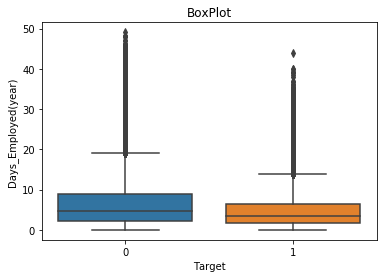

In [10]:
# it seems difficult to see their relationship by the plot above
# use boxplot 

import seaborn as sns
fig = sns.boxplot(x=train['TARGET'], y=train['DAYS_EMPLOYED']/(-365))

fig.set(title= 'BoxPlot',xlabel='Target', ylabel='Days_Employed(year)')
sns.set_context("paper", font_scale=2)

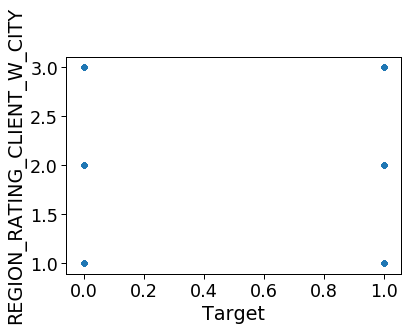

In [11]:
# plot the Target and  REGION_RATING_CLIENT_W_CITY to see their relationship
plt.scatter(train['TARGET'], train['REGION_RATING_CLIENT_W_CITY'])
plt.xlabel('Target')
plt.ylabel('REGION_RATING_CLIENT_W_CITY')
plt.show()

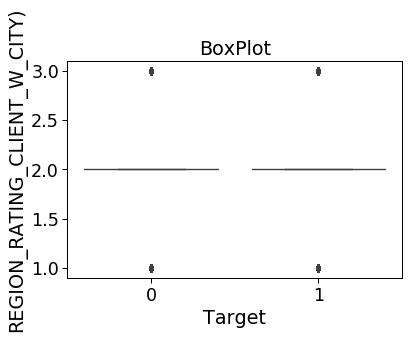

In [12]:
# it seems difficult to see their relationship by the plot above
# use boxplot 

import seaborn as sns
fig = sns.boxplot(x=train['TARGET'], y=train['REGION_RATING_CLIENT_W_CITY'])

fig.set(title= 'BoxPlot',xlabel='Target', ylabel='REGION_RATING_CLIENT_W_CITY)')
sns.set_context("paper", font_scale=2)

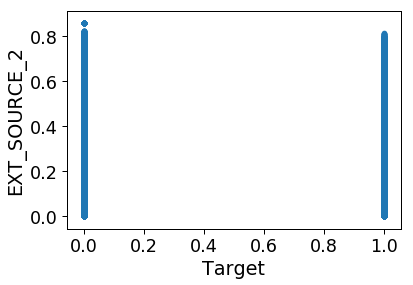

In [13]:
# plot the Target and  EXT_SOURCE_2 to see their relationship
plt.scatter(train['TARGET'], train['EXT_SOURCE_2'])
plt.xlabel('Target')
plt.ylabel('EXT_SOURCE_2')
plt.show()

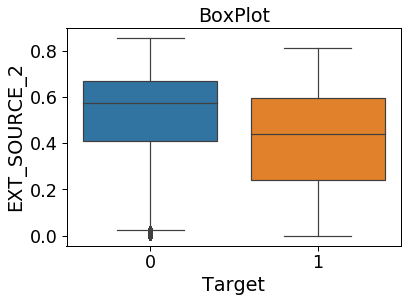

In [14]:
#  use boxplot to see the distribution
fig = sns.boxplot(x=train['TARGET'], y=train['EXT_SOURCE_2'])

fig.set(title= 'BoxPlot',xlabel='Target', ylabel='EXT_SOURCE_2')
sns.set_context("paper", font_scale=2)